# **Задание:**


1.   Выберите набор данных (датасет) для решения задачи классификации или регресии.
2.   В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
1.   С использованием метода train_test_split разделите выборку на обучающую и тестовую.
2.   Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
1.   Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
2.   Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
1.   Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
2.   Постройте кривые обучения и валидации.

Датасет: [wine](https://www.kaggle.com/brynja/wineuci/downloads/wineuci.zip/1)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve,confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [71]:
# Считывание данных
data = pd.read_csv('Wine.csv', sep=";")
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
# Типы данных
data.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [73]:
# Проверка на пустые значения
for col in data.columns:
    print('{} - {}'.format(col, data[data[col].isnull()].shape[0]))

Class - 0
Alcohol - 0
Malic acid - 0
Ash - 0
Alcalinity of ash - 0
Magnesium - 0
Total phenols - 0
Flavanoids - 0
Nonflavanoid phenols - 0
Proanthocyanins - 0
Color intensity - 0
Hue - 0
OD280/OD315 of diluted wines - 0
Proline - 0


In [74]:
# Размерность данных
data.shape

(178, 14)

# **Разделим выборку при помощи train_test_split**

In [75]:
CLASS = 'Class'
RANDOM_STATE = 17
TEST_SIZE = 0.3

X = data.drop(CLASS, axis=1).values
Y = data[CLASS].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=Y)
print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (124, 13)
X_test: (54, 13)


# **Обучение ан различном числе соседей и оценка качества**

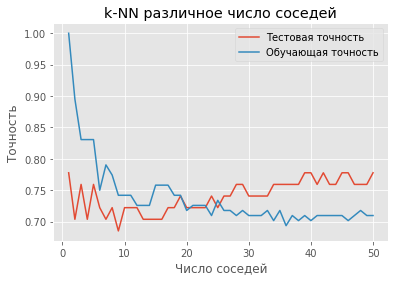

In [76]:
# Задаем число соседей
NEIGHBOURS_MAX_COUNT = 50
neighbours_count = np.arange(1, NEIGHBOURS_MAX_COUNT+1)

train_accuracy =np.empty(NEIGHBOURS_MAX_COUNT)
test_accuracy = np.empty(NEIGHBOURS_MAX_COUNT)

for i, k in enumerate(neighbours_count):
    # Настройка классификатора Knn с K соседями
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Обучить модель
    knn.fit(X_train, Y_train)
    
    # Вычислить точность на тренировочном наборе
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Вычислить точность на тестовом наборе
    test_accuracy[i] = knn.score(X_test, Y_test)
    
# Построить набор
plt.title('k-NN различное число соседей')
plt.plot(neighbours_count, test_accuracy, label='Тестовая точность')
plt.plot(neighbours_count, train_accuracy, label='Обучающая точность')
plt.legend()
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.show()

In [77]:
# Обучение и оценка качества
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.88      0.83      0.86        18
           2       0.76      0.76      0.76        21
           3       0.50      0.53      0.52        15

   micro avg       0.72      0.72      0.72        54
   macro avg       0.71      0.71      0.71        54
weighted avg       0.73      0.72      0.73        54



# **Постройте модель и оцените качество модели с использованием кросс-валидации**

In [78]:
CROSS_VALIDATOR_GENERATOR = 5
N_NEIGHBOURS_TAG = 'n_neighbors' 

param_grid = {N_NEIGHBOURS_TAG : np.arange(1, NEIGHBOURS_MAX_COUNT + 1)}
knn = KNeighborsClassifier()

knn_cv= GridSearchCV(knn, param_grid, cv = CROSS_VALIDATOR_GENERATOR)
knn_cv.fit(X_train,Y_train)


knn_cv.best_score_

0.7741935483870968

In [79]:
Y_pred = knn_cv.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        18
           2       0.71      0.71      0.71        21
           3       0.47      0.47      0.47        15

   micro avg       0.70      0.70      0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [80]:
knn_cv.best_params_

{'n_neighbors': 13}

K-fold
Данная стратегия работает в соответствии с определением кросс-валидации.

Каждой стратегии в scikit-learn ставится в соответствии специальный класс-итератор, который может быть указан в качестве параметра cv функций cross_val_score и cross_validate.

In [81]:
FOLDS_COUNT = 5
BEST_PARAMS = knn_cv.best_params_[N_NEIGHBOURS_TAG]

knn = KNeighborsClassifier(n_neighbors = BEST_PARAMS)
cv = KFold(n_splits = FOLDS_COUNT)
scores = cross_val_score(knn, X, Y, cv = cv)

np.mean(scores)

0.5263492063492062

Leave One Out (LOO)
В тестовую выборку помещается единственный элемент (One Out). Количество фолдов в этом случае определяется автоматически и равняется количеству элементов.

Данный метод более ресурсоемкий чем KFold.

Существует эмпирическое правило, что вместо Leave One Out лучше использовать KFold на 5 или 10 фолдов.

In [82]:
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
   Y_train, Y_test = Y[train_index], Y[test_index]
    
knn = KNeighborsClassifier(n_neighbors = BEST_PARAMS)
scores = cross_val_score(knn, X, Y, cv = loo)

np.mean(scores)

0.6910112359550562

Repeated K-Fold

In [83]:
knn = KNeighborsClassifier(n_neighbors = BEST_PARAMS)
cv = RepeatedKFold(n_splits = FOLDS_COUNT, n_repeats = 2)
scores = cross_val_score(knn, X, Y, cv = cv)

np.mean(scores)

0.6713492063492063

# **Постройте кривые обучения и валидации.**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

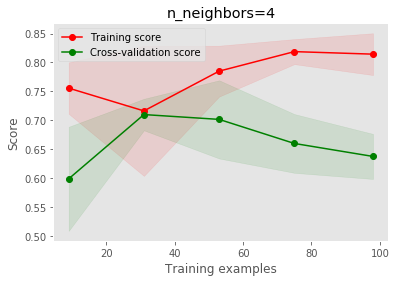

In [95]:
# Кривые обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
  
  
knn = KNeighborsClassifier(n_neighbors = 4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=Y)

plot_learning_curve(knn, 'n_neighbors=4', X_train, Y_train, cv=5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

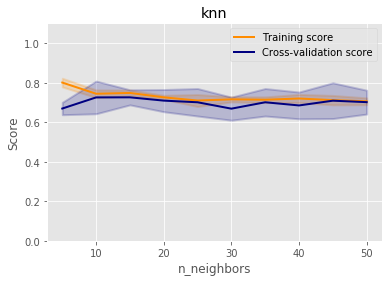

In [96]:
# Кривая валидации
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

n_range = np.array(range(5,55,5))
plot_validation_curve(KNeighborsClassifier(n_neighbors=4), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=5, scoring="accuracy")